# Solution to Problem 3

This problem is similar to Problem 2, except that the sample size is $N = 5$. Since $d_{vc} = 50$ we have $N < d_{vc}$, and the approximation $N^{d_{vc}}$ for the growth function does not hold anymore. Instead we have $m_H(N) = 2^N$.


## Solution using Brent's method

As in Problem 2 we can use `scipy.optimize.brentq` for the implicit equations.

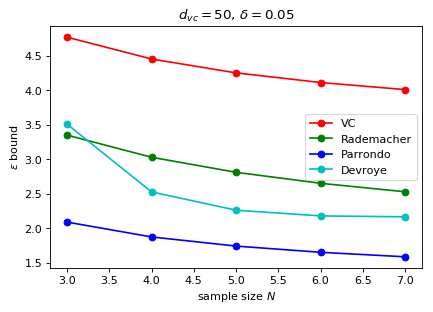

In [1]:
import math
import matplotlib.pyplot as plt
from scipy import optimize


def vc(N, d=50, delta=0.05):
    return math.sqrt( 8/N * (math.log(4 / delta) + 2*N*math.log(2))   )
    
def rademacher(N, d=50, delta=0.05):
    return math.sqrt(2/N * math.log(2 * N * 2**N )) + math.sqrt(-2/N * math.log(delta)) + 1/N

def parrondo(N, d=50, delta=0.05):
    f = lambda eps: math.sqrt((2*eps + math.log(6/delta * 2**(2*N))  )/N) - eps
    return optimize.brentq(f, 0, 5) 

def devroye(N, d=50, delta=0.05):
    f = lambda eps: math.sqrt(   (4*eps*(1+eps) + math.log(4/delta * 2**(N**2))  )   /   (2* N)  ) - eps
    return optimize.brentq(f, 0, 5) 



xs = range(3, 8, 1)
ys_vc = [vc(N) for N in xs]
ys_rademacher = [rademacher(N) for N in xs]
ys_parrondo = [parrondo(N) for N in xs]
ys_devroye = [devroye(N) for N in xs]


fig1 = plt.figure(1, dpi=80)
plt.plot(xs, ys_vc, 'ro-', label='VC')
plt.plot(xs, ys_rademacher, 'go-', label='Rademacher')
plt.plot(xs, ys_parrondo, 'bo-', label='Parrondo')
plt.plot(xs, ys_devroye, 'co-', label='Devroye')
plt.title(r'$d_{vc}=50$, $\delta=0.05$')
plt.xlabel(r'sample size $N$')
plt.ylabel(r'$\epsilon$ bound')
plt.legend()
plt.show()












## Solution using WolframAlpha

**Devroye**

http://wolframalpha.com/input/?i=sqrt%28+++%284*eps*%281%2Beps%29+%2B+ln%284%2Fdelta+*+2**%28N**2%29%29++%29+++%2F+++%282*+N%29++%29+-+eps+%3D%3D+0%2C++d%3D50%2C+N%3D5%2C+delta%3D0.05%2C+solve+for+eps

![hw4_pr3_devroye_WolframAlpha](figures/hw4_pr3_devroye_WolframAlpha.png)

_____________________________________________________________________

**Parrondo**

http://wolframalpha.com/input/?i=sqrt%28%282*eps+%2B+ln%286%2Fdelta+*+2**%282N%29%29%29%2FN%29+-+eps+%3D+0%2C+d%3D50%2C+N%3D5%2C+delta%3D0.05%2C+solve+for+eps

![hw4_pr3_devroye_WolframAlpha](figures/hw4_pr3_parrondo_WolframAlpha.png)


At $N = 5$ the Parrondo and Van den Broek bound is the smallest, so **3[c]** is the correct answer.